In [30]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set_style('whitegrid')

In [39]:
# df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
df = pd.read_parquet('Motor_Vehicle_Collisions_-_Crashes.pq')

In [40]:
df.shape

(1344596, 30)

In [41]:
my_auto = ['Sedan', 'PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', '4 dr sedan', 'Pick-up Truck', 'VAN', 'PICK-UP TRUCK', 'LIVERY VEHICLE', 'Van', '2 dr sedan', 'Box Truck', 'Convertible', 'Flat Bed']
my_motorcycle = ['Motorcycle', 'MOTORCYCLE']
my_taxi = ['Taxi', 'TAXI']
my_bus = ['Bus','BUS']
my_bike = ['Bike', 'E-Bike']
my_ambulance = ['AMBULANCE', 'Ambulance']
my_moped = ['Moped']
my_commercial = ['LARGE COM VEH(6 OR MORE TIRES)', 'SMALL COM VEH(4 TIRES)', 'Tractor Truck Diesel']

In [42]:
df['VEHICLE TYPE CODE 1'].value_counts().head(30)

Sedan                                  474666
Station Wagon/Sport Utility Vehicle    377069
PASSENGER VEHICLE                      133588
SPORT UTILITY / STATION WAGON           65910
Taxi                                    45775
4 dr sedan                              40084
Pick-up Truck                           29848
Box Truck                               20725
Bus                                     17445
Bike                                    11198
TAXI                                    10319
Tractor Truck Diesel                     8817
VAN                                      8421
OTHER                                    8251
Van                                      7704
UNKNOWN                                  6946
Motorcycle                               6212
LARGE COM VEH(6 OR MORE TIRES)           5035
BUS                                      4719
SMALL COM VEH(4 TIRES)                   4478
LIVERY VEHICLE                           4289
PICK-UP TRUCK                     

In [43]:
# uniform vehicle type

df['vehicle'] = pd.Series([], dtype='object')
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_auto), 'vehicle'] = 'automobile'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_motorcycle), 'vehicle'] = 'motorcycle'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_taxi), 'vehicle'] = 'taxi'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_bus), 'vehicle'] = 'bus'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_bike), 'vehicle'] = 'bike'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_ambulance), 'vehicle'] = 'ambulance'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_moped), 'vehicle'] = 'moped'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_commercial), 'vehicle'] = 'commercial'

In [44]:
# get rid of large titles
df.rename(columns = {'NUMBER OF PERSONS INJURED':'injured', 'NUMBER OF PERSONS KILLED': 'killed', \
                     'NUMBER OF PEDESTRIANS INJURED': 'ped_inj', 'NUMBER OF PEDESTRIANS KILLED': 'ped_kill', 'NUMBER OF CYCLIST INJURED': 'cyc_inj', \
                     'NUMBER OF CYCLIST KILLED': 'cyc_kill', 'NUMBER OF MOTORIST INJURED': 'mot_inj', 'NUMBER OF MOTORIST KILLED': 'mot_kill'}, inplace=True)

my_cols = ['vehicle', 'injured', 'killed', 'ped_inj', 'ped_kill', 'cyc_inj', 'cyc_kill', 'mot_inj', 'mot_kill']

In [45]:
df[['vehicle', 'injured', 'killed', 'ped_inj', 'ped_kill', 'cyc_inj', 'cyc_kill', 'mot_inj', 'mot_kill']].sample(10)

,vehicle,injured,killed,ped_inj,ped_kill,cyc_inj,cyc_kill,mot_inj,mot_kill
index,,,,,,,,,
766552,automobile,0.0,0.0,0,0,0,0,0,0
485437,automobile,0.0,0.0,0,0,0,0,0,0
795862,automobile,0.0,0.0,0,0,0,0,0,0
1099880,automobile,1.0,0.0,0,0,0,0,1,0
404819,taxi,0.0,0.0,0,0,0,0,0,0
900958,commercial,0.0,0.0,0,0,0,0,0,0
5780,automobile,0.0,0.0,0,0,0,0,0,0
1128247,automobile,0.0,0.0,0,0,0,0,0,0
15060,automobile,1.0,0.0,0,0,0,0,1,0


In [46]:
df.groupby('vehicle').ped_kill.sum().sort_values(ascending=True)

vehicle
moped           0
ambulance       3
bike            6
motorcycle      6
commercial     29
taxi           31
bus            48
automobile    660
Name: ped_kill, dtype: int64

In [48]:
# NYS Vehicle Registrations of File - End of year 2018  https://dmv.ny.gov/statistic/2018reginforce-web.pdf

# automobile_qty = 1912468
# motorcycle_qty = 44784
# commercial_qty = 75069
# moped_qty = 2283
# bus_qty = 8573
# taxi_qty = 111562
# ambulance_qty = 1935

stat_dict = {
'automobile': 1912468,
'taxi': 111562,
'bike': 773000, # https://www1.nyc.gov/html/dot/html/bicyclists/cyclinginthecity.shtml
'bus': 8573,
'motorcycle': 44784,
'commercial': 75069,
'ambulance': 1935,
'moped': 2283
}

# Who gets killed more often?

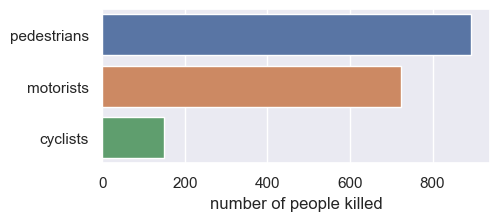

In [65]:
sns.set(rc={'figure.figsize':(5,2)})
a = [df.ped_kill.sum(), df.mot_kill.sum(), df.cyc_kill.sum()]
labels = ['pedestrians', 'motorists', 'cyclists']

g=sns.barplot(x=a, y=labels)
plt.xlabel('number of people killed')

plt.show()

# Driving which vehicle is more likely to injure a pedestrian

In [13]:
df[my_cols].tail()

,vehicle,injured,killed,ped_inj,ped_kill,cyc_inj,cyc_kill,mot_inj,mot_kill
914164,NaN,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
914165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


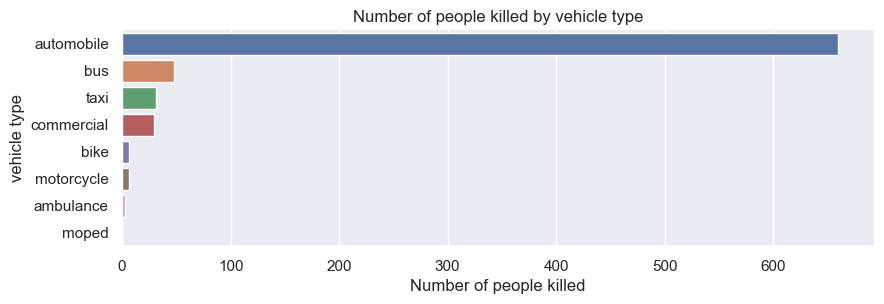

In [63]:
# Who kills pedestrians ?
sns.set(rc={'figure.figsize':(7,3)})
df_who_kills = df.groupby('vehicle', as_index=False).ped_kill.sum().sort_values(by='ped_kill', ascending=False).copy(deep=True)

g=sns.catplot(y='vehicle', x='ped_kill', data=df_who_kills, kind='bar',orient='h', height=3, aspect=3)
g.set(xlabel='Number of people killed', ylabel='vehicle type')
plt.title('Number of people killed by vehicle type')
plt.show()

In [66]:
# Casualty RATE by vehicle type - PEDESTRIANS

df_rate = df.groupby('vehicle')[['ped_inj', 'ped_kill']].sum()
df_rate['registred'] = df_rate.index.map(stat_dict)
df_rate['rate_inj_per_1K'] = df_rate.ped_inj / df_rate.registred * 1000
df_rate['rate_kill_per_10K'] = df_rate.ped_kill / df_rate.registred * 10000
#df_rate.sort_values(by='rate', ascending=False, inplace=True)

In [67]:
df_rate

,ped_inj,ped_kill,registred,rate_inj_per_1K,rate_kill_per_10K
vehicle,,,,,
ambulance,74,3,1935,38.242894,15.503876
automobile,52736,660,1912468,27.574840,3.451038
bike,1707,6,773000,2.208279,0.077620
bus,1040,48,8573,121.311093,55.989735
commercial,131,29,75069,1.745061,3.863113
moped,71,0,2283,31.099431,0.000000
motorcycle,342,6,44784,7.636656,1.339764
taxi,3538,31,111562,31.713307,2.778724


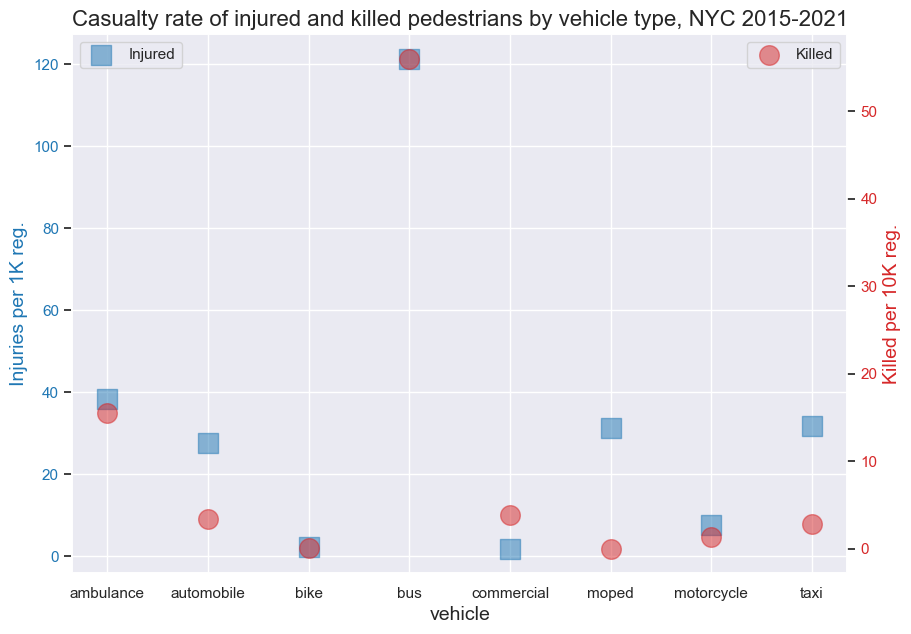

In [69]:
x1 = df_rate.index
y1 = df_rate.rate_inj_per_1K

x2 = df_rate.index
y2 = df_rate.rate_kill_per_10K

fig, ax1  = plt.subplots(figsize=(10,7))
color = 'tab:blue'
ax1.set_xlabel('vehicle', size=14)
ax1.set_ylabel('Injuries per 1K reg.', color=color, size=14)
ax1.scatter(x1, y1, marker='s', color=color, label='Injured', alpha=0.5, s=200)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Killed per 10K reg.', color=color, size=14)  # we already handled the x-label with ax1
ax2.scatter(x2, y2, color=color, label='Killed', alpha=0.5, marker='o', s=200)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Casualty rate of injured and killed pedestrians by vehicle type, NYC 2015-2021', size=16)
plt.grid()
plt.show()